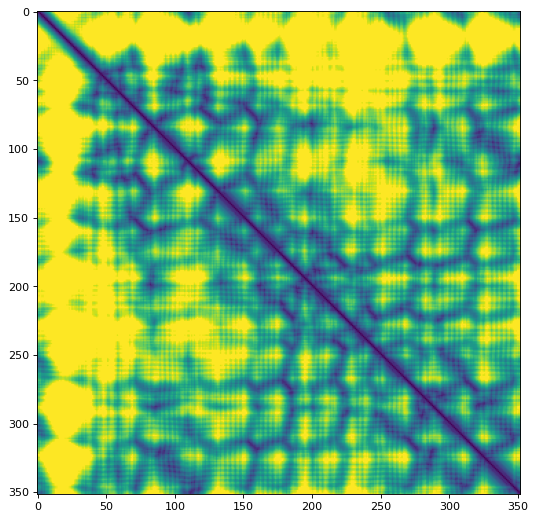

torch.Size([40, 40])


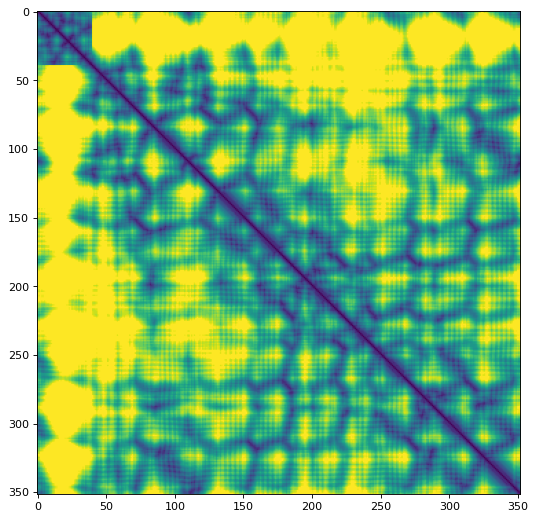

In [4]:
import util


x = util.distm_pdb('agma/agma_af.pdb')
y = util.distm_pdb('agma/agma_random.pdb')
x.shape, y.shape
util.plot_image(x)
A,B=0,39

#crds = util.mds_coord(x); util.plot_chain(crds)
print(y.shape)
x[A:B+1,A:B+1] = y
util.plot_image(x)
#crds = util.mds_coord(x); util.plot_chain(crds)
#print(crds)

#util.plot_image(y)
#1-40
#313-533

In [5]:
import dcon_format
seq = util.fasta_parse('agma/agma.fasta')[0][1]
dcon_format.create_rr(seq, x, 'agma/agma_res12.rr')

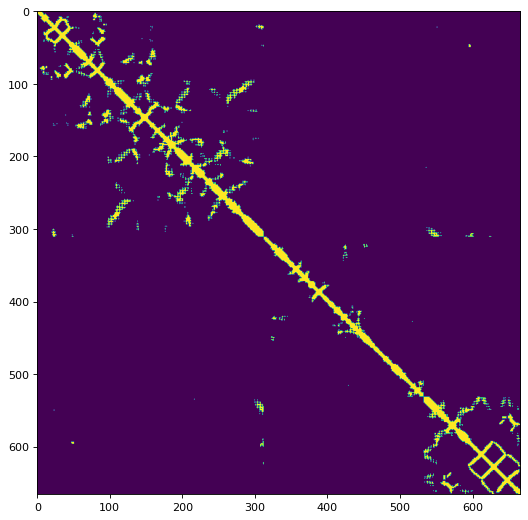

In [11]:
import util

x = util.distm_pdb('replace_distm/cdpk_alphafold.pdb')
y = util.distm_pdb('replace_distm/cdpk_random.pdb')
x.shape, y.shape
#util.plot_image(x<8)
A,B=312,532

#crds = util.mds_coord(x[:300,:300]); util.plot_chain(crds)

x[A:B+1,A:B+1] = y
M = x.max()
x[B:,A:B] = M
x[A:B,B:] = M
x[A:B,:A] = M
x[:A,A:B] = M
#x[:,B:] = M
#print(y.shape, x[A:B+1, A:B+1].shape)
util.plot_image(x<12)
#crds = util.mds_coord(x[:300,:300]); util.plot_chain(crds)
seq = util.fasta_parse('replace_distm/cdpk.fasta')[0][1]
dcon_format.create_rr(seq, x, 'cdpk_test2res12.rr')

#util.plot_image(y)
#1-40
#313-533

In [ ]:
new1 = util.distm_pdb('cdpk_model1.pdb')
util.plot_image(new1)

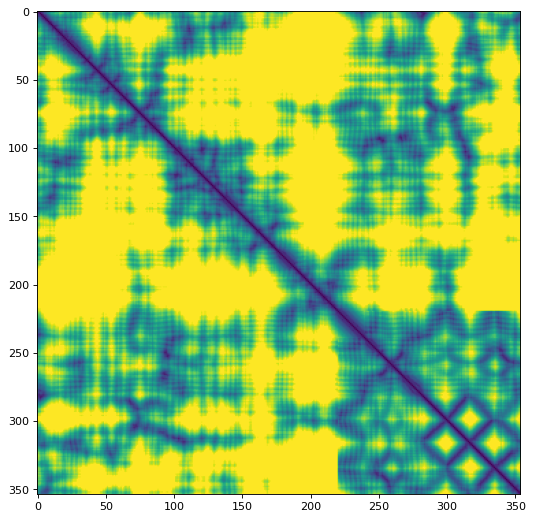

In [6]:
import util
A,B=312,532
af2 = util.distm_pdb('replace_distm/cdpk_alphafold.pdb')

new1 = util.distm_pdb('cdpk_model1.pdb')
new1[B:,B:] = af2[B:,B:]
#util.plot_image(new1)

new2 = util.distm_pdb('cdpk_model1.pdb')
new2[B:,:] = af2[B:,:]
new2[:,B:] = af2[:,B:]
#util.plot_image(new2)

new3= util.distm_pdb('cdpk_model1.pdb')
M = new3.max()
new3[B:,:] = M
new3[:,B:] = M
new3[B:,B:] = af2[B:,B:]
#util.plot_image(new3)

new4= util.distm_pdb('cdpk_model1.pdb')
M = new3.max()
new4[B:,:A] = af2[B:,:A]
new4[:A,B:] = af2[:A,B:]
#new4[:,B:] = M
new4[B:,B:] = af2[B:,B:]
util.plot_image(new4[A:,A:])


In [ ]:
* Need util function to spitout new fasta
* 

In [7]:
import dcon_format
A,B=312,532
seq = util.fasta_parse('replace_distm/cdpk.fasta')[0][1]
name1 = '>cdpk_alphafold.pdb (#3) chain A/1-532'
name2 = '>cdpk_alphafold.pdb (#3) chain A/312-666'

dcon_format.create_rr(seq[:B], new4[:B], 'cdpk_split1.rr')
dcon_format.create_rr(seq[A:], new4[A:], 'cdpk_split2.rr')
util.writeListToFile([name1,seq[:B]],'cdpk_split1.fasta')
util.writeListToFile([name2,seq[A:]],'cdpk_split2.fasta')
SS = 'CCCCCCCCCHHHCEEEEEEEEEECCEEEEEEEECCCCEEEEEEEEEHHHCCHHHHHHHHHHHHHHHHCCCCCECCEEEEEEECCEEEEEEECCCCEEHHHHHHHCCCCEHHHHHHHHHHHHHHHHHHHHHCEECCCCCHHHEEECCCCCCCCEEECCCCCCEECCCCCCECCCCCCCCCCCCHHHHHCCCECHHHHHHHHHHHHHHHHHCCCCCCCCCHHHHHHHHHHCCCCCCCCCCCCCCHHHHHHHHHHHCCCCCCCCCHHHHHHCHHHHHHHHHCCCCECHHHHHHHHHHHHHHHHHHHHHHHHHHHCCEECCCCCCCCCCCCCCCHHHHHHHHHHHHHHCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCEEEEECCCCCCEECCCCCCCCCCCCCCCCCCCCCHHHHHHCCCCCCCCCCCCCCCCCCCCCCCCCCCCCHHHHHHHHHHCCCCCCCCCCCCCCCCCCCCCHCCCCCCCCCHHHHHHHHHHHCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCHHHHHHHHHHHHHHHHHHCCHHHHHHHEEEEEEEEEHHHCCEEEECHHHHHHHHHHHHHHCCCCCEEEEEEEEEEEECCCEEEEEEEEEEEEECCCCCEEEEEEEEEEEEEEECCEEEEEEEEEEECCCCCCC'
util.writeListToFile([SS[:B]],'cdpk_split1.ss')
util.writeListToFile([SS[A:]],'cdpk_split2.ss')

In [ ]:
import util
m = util.writeFileToList('cdpk_test2.rr')
m = [ x.split()[:2] for x in m[1:]]
m = [ [int(n) for n in x] for x in m]
import torch

check = torch.zeros(666,666)
for i,j in m:
    check[i,j] = 1
    check[j,i] = 1
for i in range(666):
    check[i,i] = 1
    
util.plot_image(check.bool())
util.plot_image(new4<8)
util.plot_image(x<8)
x.sum(), check.sum()

In [ ]:
test1 = util.distm_pdb('cdpk_test1_model1.pdb')
test2 = util.distm_pdb('cdpk_test2_model1.pdb')
util.plot_image(test1)
util.plot_image(test2)


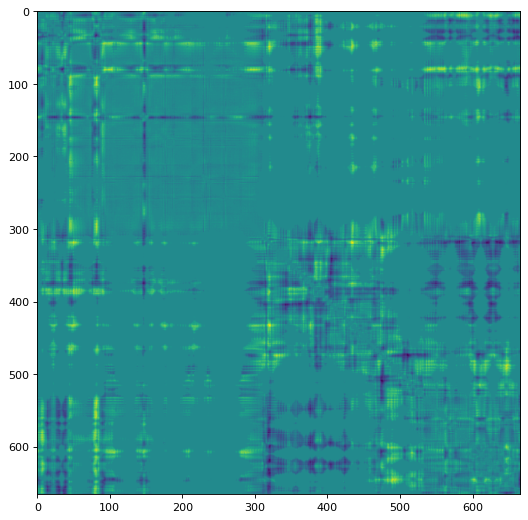

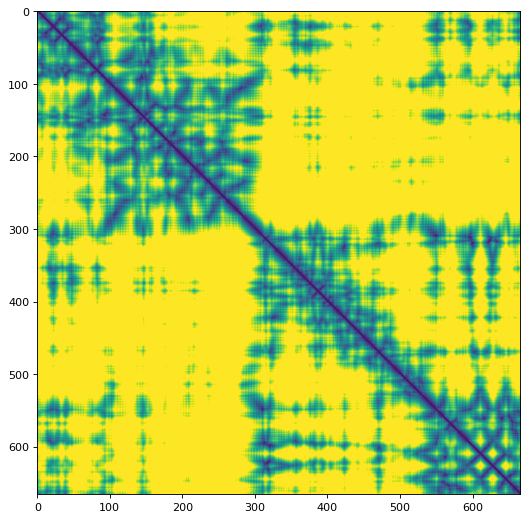

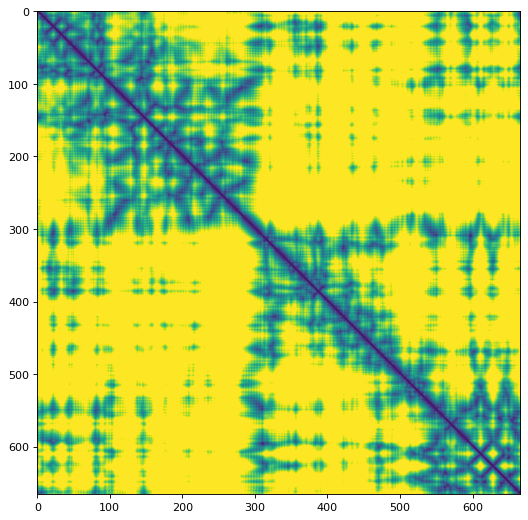

In [13]:
import util
x = util.distm_pdb('new_test/cdpk_test2_model1.pdb')
y = util.distm_pdb('new_test/cdpk_test2_repeat_model1.pdb')
util.plot_image(x-y)
util.plot_image(x)
util.plot_image(y)
